# Analyzing Ford GoBike  
## by (Nedal Adham)

## General over veiw 

> in this nootbook we will take a look at fords 2019 Gobike provided by them ... an easy set to wrangle and work one 

### Dataset overveiw 

>- Trip Duration (in seconds)
 - Start Time and Date
 - End Time and Date
 - Start Station ID
 - Start Station Name
 - Start Station Latitude
 - Start Station Longitude
 - End Station ID
 - End Station Name
 - End Station Latitude
 - End Station Longitude
 - Bike ID
 - User Type (Subscriber or Customer - "Subscriber" = Member or "Customer" = Casual)
 - Member Year of Birth
 - Member Gender

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
display (df.head() , df.describe() ,df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


None

Some data wrangling

In [4]:
#changing start and end time into timestamp
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [5]:
display (df.user_type.value_counts() , df.isnull().sum() , df.shape ,)

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

(183412, 16)

In [6]:
cdf=df.copy()
#make duration in min col that is easy to deal with 
cdf ['duration_min'] = cdf['duration_sec']/60
cdf ['duration_min'] = cdf['duration_min'].astype(int)
cdf.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869


### What is the structure of your dataset?

> 183412 bikes by ford are given a 17 specs of it (duration_sec	,start_time	end_time	,start_station_id,	start_station_name,	start_station_latitude,	start_station_longitude	,end_station_id	,end_station_name,	end_station_latitude,	end_station_longitude,	bike_id	user_type,	member_birth_year,	member_gender,	bike_share_for_all_trip	, duration_min)
(10 numercal  ,2 datetime ,4 obj ,1 bool)

### What is/are the main feature(s) of interest in your dataset?

> the relation between duration and other factors (day,month,hour,distance)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> may be start and end points , gender and age (birthyear)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [7]:
color = sb.color_palette()[0]

### Duration of ride in minutes 

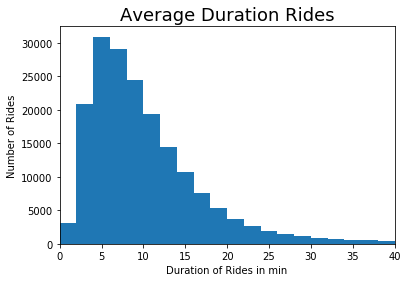

In [8]:
bins = np.arange(0, cdf['duration_min'].max()+500,2)
plt.hist (data = cdf , x = 'duration_min' , bins =bins)
plt . xlim (0,40)

plt.title('Average Duration Rides', fontsize = 18);
plt.xlabel('Duration of Rides in min');
plt.ylabel('Number of Rides');

>average ride takes from 4.5 to 5 mins 

### Dateof birth of most riders 

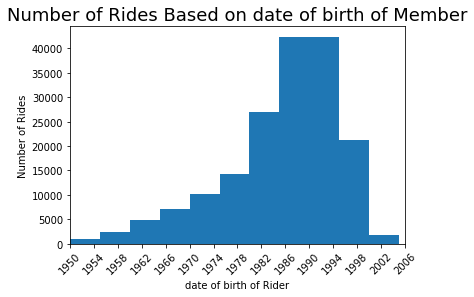

In [9]:

years = np.arange(1950,2010,4)
bins = np.arange(1950 , 2015+5 , 5)
plt.hist(data = cdf, x = 'member_birth_year' , bins = bins );
plt.xlim(1950,2005)
plt.xticks(years,rotation=45)

plt.title('Number of Rides Based on date of birth of Member', fontsize = 18);
plt.xlabel('date of birth of Rider');
plt.ylabel('Number of Rides');

> most of Ford GOBike riders are born between 1986 and 1994 that mean the average age is between mid 30's 

### which has more users custumors or subscriber ?, most presented Gender?




Text(0, 0.5, 'Number of Users')

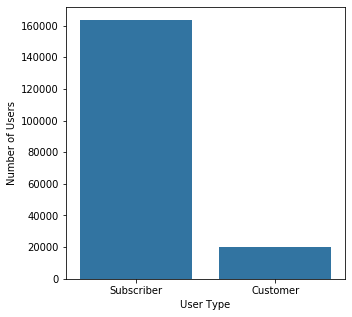

In [10]:
plt.figure(figsize=[5,5])
sb.countplot(data= cdf ,x = cdf.user_type , color = color
            ,order=(cdf['user_type'].value_counts().index))
plt.xlabel('User Type')
plt.ylabel('Number of Users')


Text(0, 0.5, 'Number of Users')

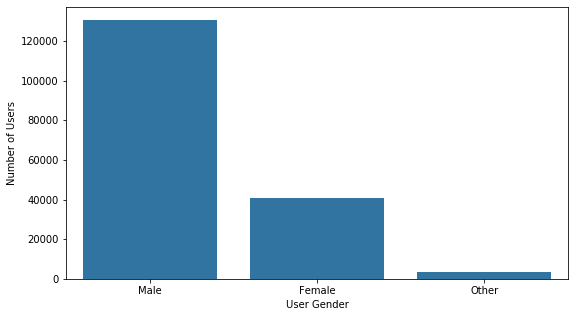

In [11]:
plt.figure(figsize=[9,5])
sb.countplot(data= cdf ,x = cdf.member_gender , color = color 
             ,order=(cdf['member_gender'].value_counts().index))
plt.xlabel('User Gender')
plt.ylabel('Number of Users')

> male are more than females , subscriber users are more than costumer user

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> no unusual points

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Ihave changed start and end time to timestamp , and created duration in minutes not in second to be more sagnificant and easy to understand 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [12]:
#Getting the start and end hour
cdf['start_hour'] = cdf['start_time'].dt.strftime('%H')
cdf['end_hour'] = cdf['end_time'].dt.strftime('%H')

#Getting the start and end day
cdf['start_day'] = cdf['start_time'].dt.strftime('%a')
cdf['end_day'] = cdf['end_time'].dt.strftime('%a')

#Getting the start and end month
cdf['start_month'] = cdf['start_time'].dt.strftime('%B')
cdf['end_month'] = cdf['end_time'].dt.strftime('%B')


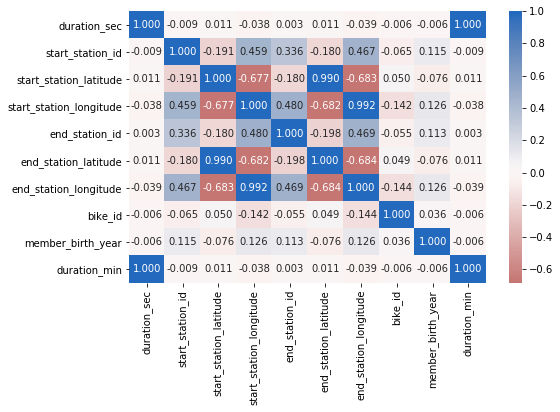

In [13]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(cdf.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

> heatmap indicate a strong corelation between end station latitude and start station latitude ,  a strong corelation between end station longatitude and start station longatitude 

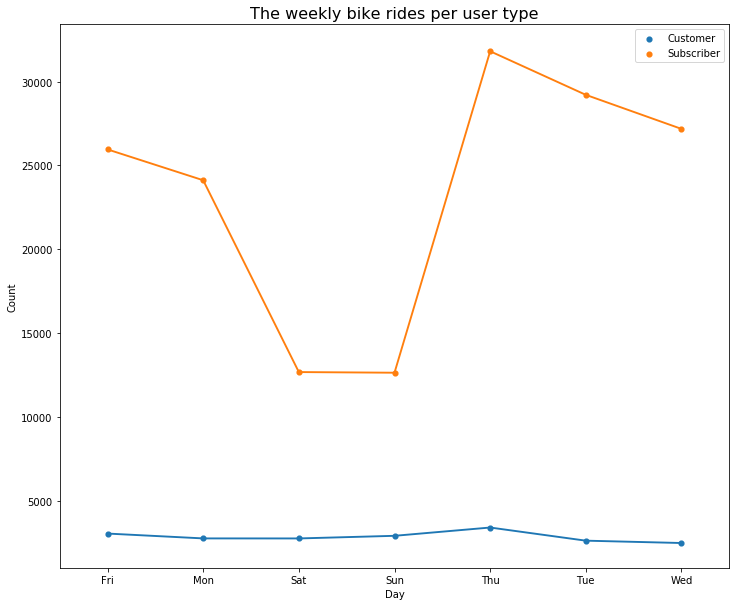

In [14]:
cdf1bi = cdf.groupby(["start_day", "user_type"]).size().reset_index()

plt.figure(figsize=(12,10))
axis = sb.pointplot( data=cdf1bi, x='start_day', y=0, hue='user_type' , scale=.7)
plt.title('The weekly bike rides per user type', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Count')
leg = axis.legend()



> 1-number of rides for customers are low as number of subscriber > customer 

>2-subscriber riders decrease at sunday and saturday (holidays)

Text(0.5, 1.0, 'Duration per week')

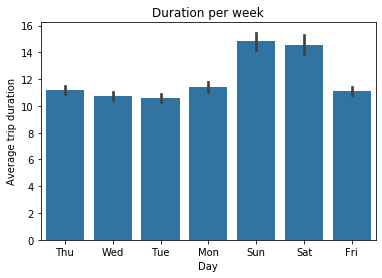

In [15]:

sb.barplot(data=cdf, x='start_day' , y= 'duration_min',color = sb.color_palette()[0] );
plt.xlabel('Day')
plt.ylabel('Average trip duration')
plt.title('Duration per week')

> trips are long at sunday and saturday it decrease gradualy at mon day , then it decrease at wendesday and tuseday

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> heatmap indicate a strong corelation between end station latitude and start station latitude , and between end station longatitude and start station longatitude

>subscriber riders decrease at sunday and saturday (holidays) ,number of rides for customers are low as number of subscriber > customer

>trips are long at sunday and saturday it decrease gradualy at mon day , then it decrease at wendesday and tuseday


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Nope

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

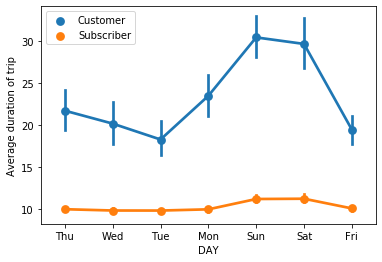

In [16]:
sb . pointplot(data=cdf , x='start_day',y='duration_min',hue='user_type')
plt.xlabel("DAY")
plt.ylabel("Average duration of trip")
plt.legend()

>customer ride for longer trips than subscriber , both increase average time at sunday and saturday 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>customer ride for longer trips than subscriber 

>both increase average time at sunday and saturday

### Were there any interesting or surprising interactions between features?

> average duration of trip in multivariate differ completly from count of bike in bivariate 

summary of findings 

1-customer ride for longer trips than subscriber
2-average duration of trip in multivariate differ completly from count of bike in bivariate
3-both increase average time at sunday and saturday
4-heatmap indicate a strong corelation between end station latitude and start station latitude , and between end station longatitude and start station longatitude

5-subscriber riders decrease at sunday and saturday (holidays) ,number of rides for customers are low as number of subscriber > customer

6-trips are long at sunday and saturday it decrease gradualy at mon day , then it decrease at wendesday and tuseday
7-male are more than females , subscriber users are more than costumer user
8-most of Ford GOBike riders are born between 1986 and 1994 that mean the average age is between mid 30's
9-average ride takes from 4.5 to 5 mins